## Correlation

Consider the relationship between `sales` and `store.size` from the previous lesson:

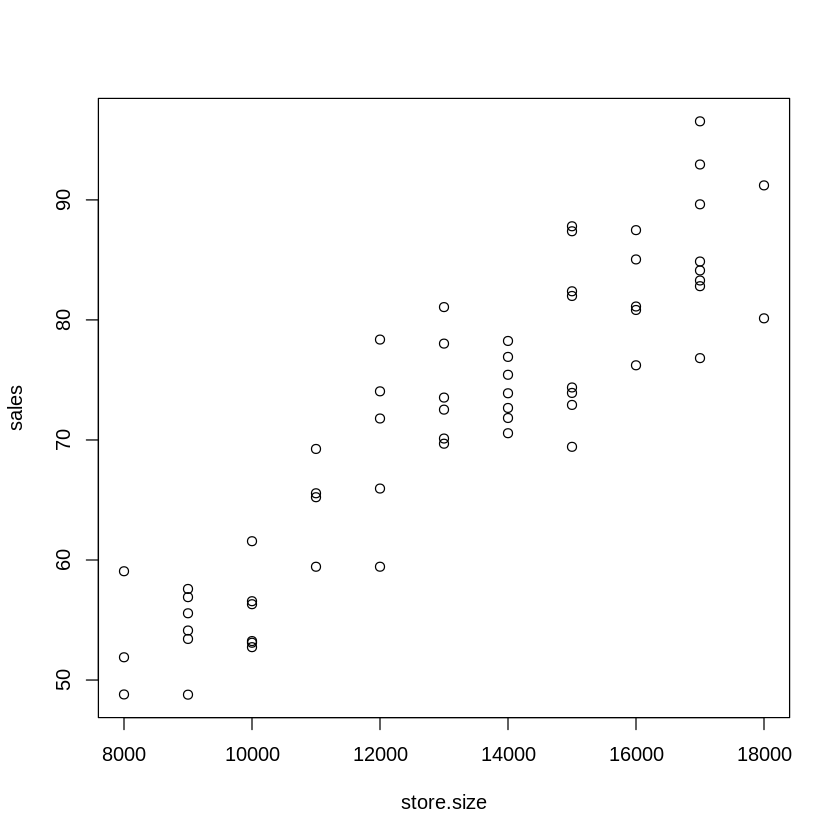

In [1]:
sales.df <- read.csv("data/store-sales-multiple-regression.csv")
plot(sales ~ store.size, data=sales.df)

How strong is the linear relationship between these variables? How does it compare to the strength of relationships between other variables? It is useful to have a standard way of answering the questions above. 

Our first reasonable guess might be to measure the strength of the linear relationship by calculating the slope of the best-fit line:

In [2]:
model.sales <- lm(sales ~ store.size, data=sales.df)
coefficients(model.sales)['store.size']

store.size 
0.003837652

However, this is not a good option for comparing the strength of different linear relationships because this coefficient value depends on the units of our variables. This can make a very weak relationship appear strong simply because different units are used.

In order to address this problem, we can use the `cor` function to calculate the *correlation* between our two variables. The correlation between two variables is a standardized measure of the strength of the apparent linear relationship between those variables - it can be calculated very simply as follows:

In [3]:
cor(sales.df$sales, sales.df$store.size)

[1] 0.9076638

Comparing correlation values across different pairs of variables is possible because the `cor` function always returns a value between `-1` and `1`. A value of `-1` indicates a perfect decreasing linear relationship between the variables, a value of `0` indicates no linear relationship (pure noise), and a value of `1` indicates a perfect increasing linear relationship. We can see these results below:

In [4]:
x1 <- 1:10
y <- x1
x2 <- -1*1:10
x3 <- rep(0, 10)
cor(x1, y)
cor(x2, y)

[1] 1

[1] -1

<span style="color:blue;font-weight:bold">Exercise</span>: Calculate the correlation between the `store.size` and `employee.morale.store.avg` columns of `sales.df` and store the result in the variable `x.cor`:

In [9]:
# delete this entire line and replace it with your code

x.cor <- cor(sales.df$store.size, sales.df$employee.morale.store.avg)
print(x.cor)
summary(x.cor)


[1] -0.2158187


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2158 -0.2158 -0.2158 -0.2158 -0.2158 -0.2158 

In [10]:
check.variable.value("x.cor", cor(sales.df$store.size, sales.df$employee.morale.store.avg))
success()

Correct!

You will see correlation values reported very often. However, it is extremely important to remember that *a low magnitude correlation value does not necessarily mean that the variables have no relationship.* It is quite possible that the relationship is simply being "hidden" by the confounding effects of other variables. You should therefore be very cautious about placing too much emphasis on correlation values; they are just a guide, nothing more. 

## Omitted Variable Bias

In the last lesson, we touched briefly on the fact that attempting to analyze only one *x* variable's impact on *y* at a time can provide a distorted picture of the relationship between variables in our data. The standard name for this effect is *omitted variable bias* - by omitting one of the variables that ought to be included in our model, we are introducing bias into our model's parameter estimates. 

We will continue to explore exactly how confusing omitted variable bias can be by considering the following dataset:

In [10]:
ovb.df <- read.csv("data/omitted-variable-bias.csv")
head(ovb.df)

monthly.social.media.posts,years.experience,annual.salary
<int>,<int>,<int>
148,11,100
260,6,96
106,12,96
27,21,150
170,12,91
120,14,131


This fictional dataset contains the following fields for a set of employees:

* The average number of monthly social media posts made by the employee. 
* The number of years of experience that the employee has in our industry. 
* The employee's annual salary in USD.

Our goal in this lesson is to understand how `monthly.social.media.posts` and `years.experience` affect `annual.salary`

First, let's take a look at the relationship between `years.experience` and `annual.salary`:

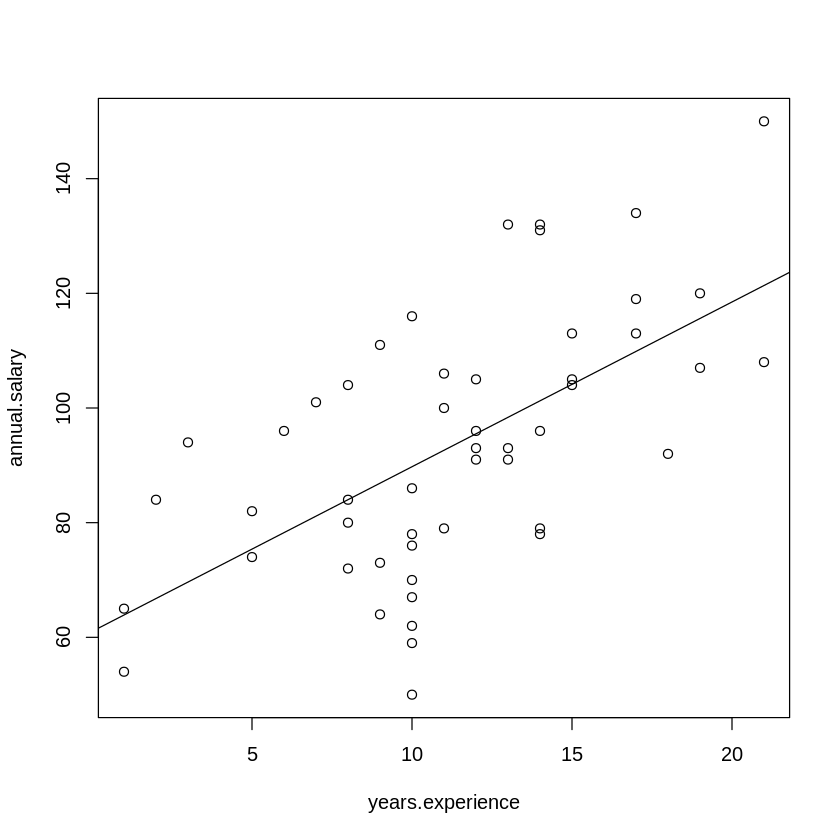

In [11]:
plot(annual.salary ~ years.experience, data=ovb.df)
abline(lm(annual.salary ~ years.experience, data=ovb.df))

This graph makes intuitive sense - workers with more experience earn more. Let's now take a look at the relationship between `monthly.social.media.posts` and `annual.salary`:

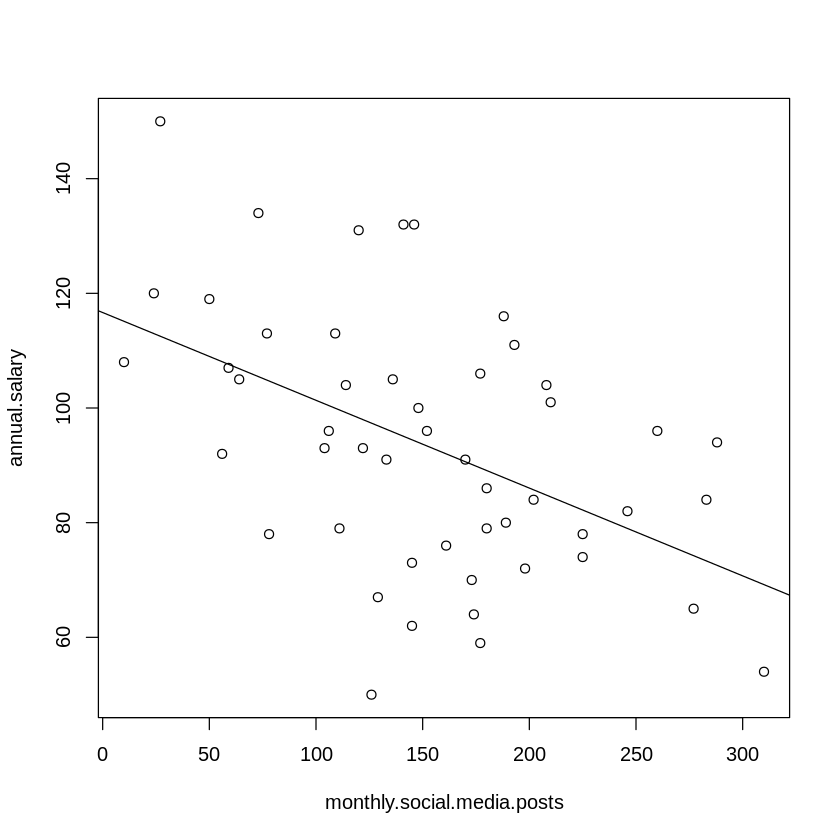

In [12]:
plot(annual.salary ~ monthly.social.media.posts, data=ovb.df)
abline(lm(annual.salary ~ monthly.social.media.posts, data=ovb.df))

At first glance, it appears that making more social media posts is related to a decline in salary. It would be very easy to draw a false conclusion from the data above, such as: "employees who waste time on social media earn less." However, it is here that we must be very careful not to make a serious mistake. It is *essential* that we properly account for the relationship between `monthly.social.media.posts` and `years.experience`:

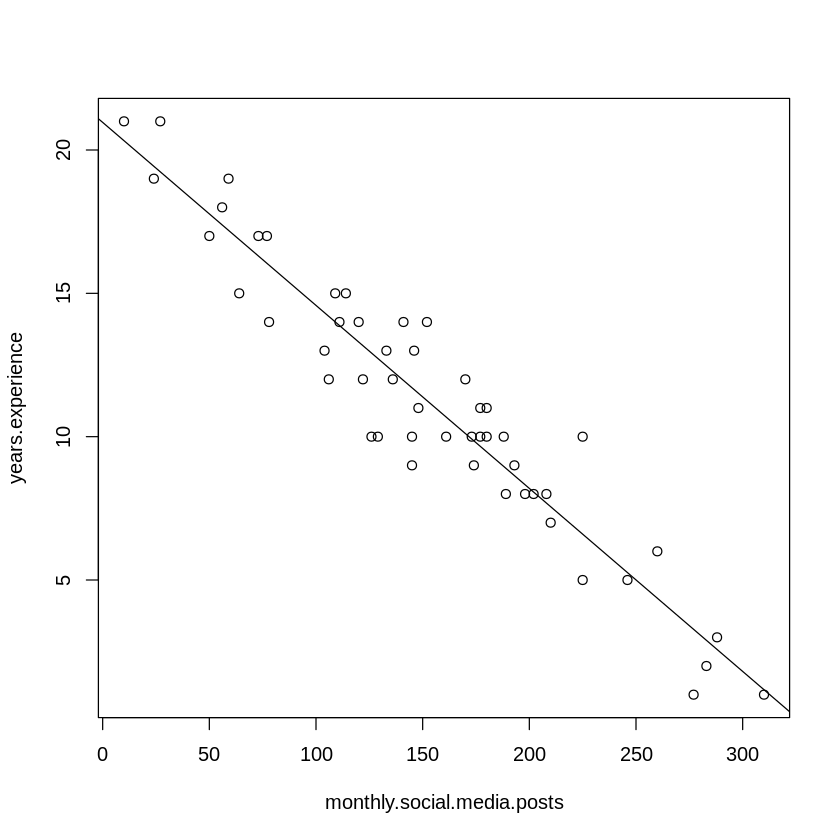

In [13]:
plot(years.experience ~ monthly.social.media.posts, data=ovb.df)
abline(lm(years.experience ~ monthly.social.media.posts, data=ovb.df))

We can see from the graph above that making more social media posts is *negatively correlated* with the number of years of industry experience. This relationship is plausible; as of 2019, older workers are less likely to use social media extensively. Since older workers also earn more due to their more extensive experience, this creates a false *appearance* that social media use leads to a drop in earnings. 

## Controlling for Confounding Variables

To see the *true* relationship that our predictors (`monthly.social.media.posts` and `years.experience`) have with our dependent variable `annual.salary`, we need to construct a multiple regression model that includes both predictors:

In [14]:
model.multiple <- lm(
    annual.salary ~ monthly.social.media.posts + years.experience, 
    data=ovb.df
)

This model shows us the surprising result that employees who post more often on social media *actually earn more* after controlling for years of experience - we know this because the coefficient of `monthly.social.media.posts` is positive:

In [15]:
summary(model.multiple)


Call:
lm(formula = annual.salary ~ monthly.social.media.posts + years.experience, 
    data = ovb.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.076 -13.382   1.593  12.163  27.530 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -40.3810    35.2120  -1.147  0.25727    
monthly.social.media.posts   0.3251     0.1111   2.925  0.00528 ** 
years.experience             7.4909     1.6577   4.519 4.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.84 on 47 degrees of freedom
Multiple R-squared:  0.4643,	Adjusted R-squared:  0.4416 
F-statistic: 20.37 on 2 and 47 DF,  p-value: 4.253e-07


We must now be very careful to clarify a key point: *correlation is not causation* - this statement may be a cliche, but it is extremely important in cases like the dataset above. The model above does not *necessarily* suggest that a worker can increase their annual salary by posting more often on social media. However, it is quite likely that `monthly.social.media.posts` is correlated with another confounding variable not included in our dataset, such as `technical.skill.level`, and this confounding variable is actually what is driving the increase in earnings.  